# Schematic description of how the package and the API would works

#### Sources: 

- [x] https://christophergs.com/machine%20learning/2019/03/17/how-to-deploy-machine-learning-models/
- https://christophergs.com/machine%20learning/2019/03/30/deploying-machine-learning-applications-in-shadow-mode
- https://christophergs.com/machine%20learning/2020/03/14/how-to-monitor-machine-learning-models/
- https://landing.google.com/sre/sre-book/chapters/testing-reliability/
- https://medium.com/@copyconstruct/monitoring-in-the-time-of-cloud-native-c87c7a5bfa3e
- https://cloud.google.com/blog/products/gcp/cre-life-lessons-what-is-a-dark-launch-and-what-does-it-do-for-me
- https://martinfowler.com/articles/feature-toggles.html
- [x] https://cloud.google.com/solutions/machine-learning/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning
- [x] https://cloud.google.com/blog/products/ai-machine-learning/itau-unibanco-how-we-built-a-cicd-pipeline-for-machine-learning-with-online-training-in-kubeflow
- https://research.google/pubs/pub43146/
- https://papers.nips.cc/paper/5656-hidden-technical-debt-in-machine-learning-systems.pdf
- https://developers.google.com/machine-learning/guides/rules-of-ml/?_ga=2.89822301.795599377.1589120394-1535751243.1572158536#training-serving_skew
- https://www.forbes.com/sites/forbestechcouncil/2019/04/03/why-machine-learning-models-crash-and-burn-in-production/#61e8b1f92f43
- https://developers.google.com/machine-learning/testing-debugging

#### Helpful testing tools:
- https://github.com/ionelmc/pytest-benchmark
- https://github.com/kubeflow/kubeflow
- https://netflixtechblog.com/scheduling-notebooks-348e6c14cfd6
- https://flask.palletsprojects.com/en/1.0.x/blueprints/
- https://dzone.com/articles/schema-first-api-design


Code repository - Github: https://github.com/screwdriver66/solar_prod_suvilahti

The model includes two parts: 
- A trained model package
- API that has GET and POST endpoints to work with the trained model

#### Use cases: 
A user can install the package from a resource. He might use the package in his script the following way:

>		import solar_prod_suvilahti
	
Then later in the script use: 
		
>		get_forecast()


circleci - for continuous integration end deployment

post the package to gemfury, so that people can install it properly
- but what is inside the installation? 
- and where is the model?
- what do we need heroku for?

# Testing in CI/CD pipeline

First of all, the process of CI/CD integration should not retrain the model online. It is computationally too expensive. We retrain the model offline.

Thus, if we make changes to the feature engineering pipeline, pipeline inputs and so on- we need to retrain the model. This happens offline. Thus, we need to create a set of tests that would reflect these requirements. 

Something like: 
if there are changes to the features, then circleci needs to find a .pkl file and updated version file.

In [1]:
import math
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
# unit testing feature engineering logic
from regression_model.processing import data_management as dm
from regression_model.processing import preprocessors as pp
from regression_model.config import config

In [2]:
data = dm.load_dataset(filename=config.TRAINING_DATA_FILE)
data = dm.load_dataset(filename=config.TRAINING_DATA_FILE)
ct0 = pp.TemporalHour(variable=config.TEMPORAL_HOUR, ref_feature=config.DATETIME_INDEX)
ct1 = pp.TemporalDayofYear(variable=config.TEMPORAL_DAY, ref_feature=config.DATETIME_INDEX)
ct2 = pp.SolarElevAngle(var_name=config.SOLAR_ANGLE, day=config.TEMPORAL_DAY, hour=config.TEMPORAL_HOUR)
ct3 = pp.SunAzimuth(var_name=config.SUN_AZIMUTH, day=config.TEMPORAL_DAY, hour=config.TEMPORAL_HOUR)
ct4 = pp.TheoreticalRadiation(var_name=config.THEOR_SRAD, day=config.TEMPORAL_DAY, hour=config.TEMPORAL_HOUR)
data_t = ct0.transform(data)
data_t = ct1.transform(data_t)
data_t = ct2.transform(data_t)
data_t = ct3.transform(data_t)
data_t = ct4.transform(data_t)
var = config.THEOR_SRAD

In [3]:
data_t.columns

Index(['datetime_converted', 'CloudAmount', 'Pressure_msl_hpa',
       'RelativeHumidity_percent', 'PrecipitationIntensity_mm_h',
       'SnowDepth_cm', 'AirTemperature_degC', 'DewPointTemperature_degC',
       'HorizontalVisibility_m', 'WindDirection', 'GustSpeed_m_s',
       'WindSpeed_m_s', 'Energy_kWh', 'GlobalRadiation_W_m2', 'Hour',
       'DayofYear', 'SolarElevationAngle_deg', 'SunAzimuth_deg',
       'TheoreticalSolarRadiation'],
      dtype='object')

In [10]:
cols = ['Energy_kWh', 'GlobalRadiation_W_m2', 'TheoreticalSolarRadiation']

In [5]:
data_t[cols].corr()

,Energy_kWh,GlobalRadiation_W_m2,TheoreticalSolarRadiation
Energy_kWh,1.000000,0.934546,0.871073
GlobalRadiation_W_m2,0.934546,1.000000,0.855900
TheoreticalSolarRadiation,0.871073,0.855900,1.000000


c:\users\screwdriver\desktop\github\solar_prod_suvilahti\solar_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\screwdriver\desktop\github\solar_prod_suvilahti\solar_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\screwdriver\desktop\github\solar_prod_suvilahti\solar_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowsp

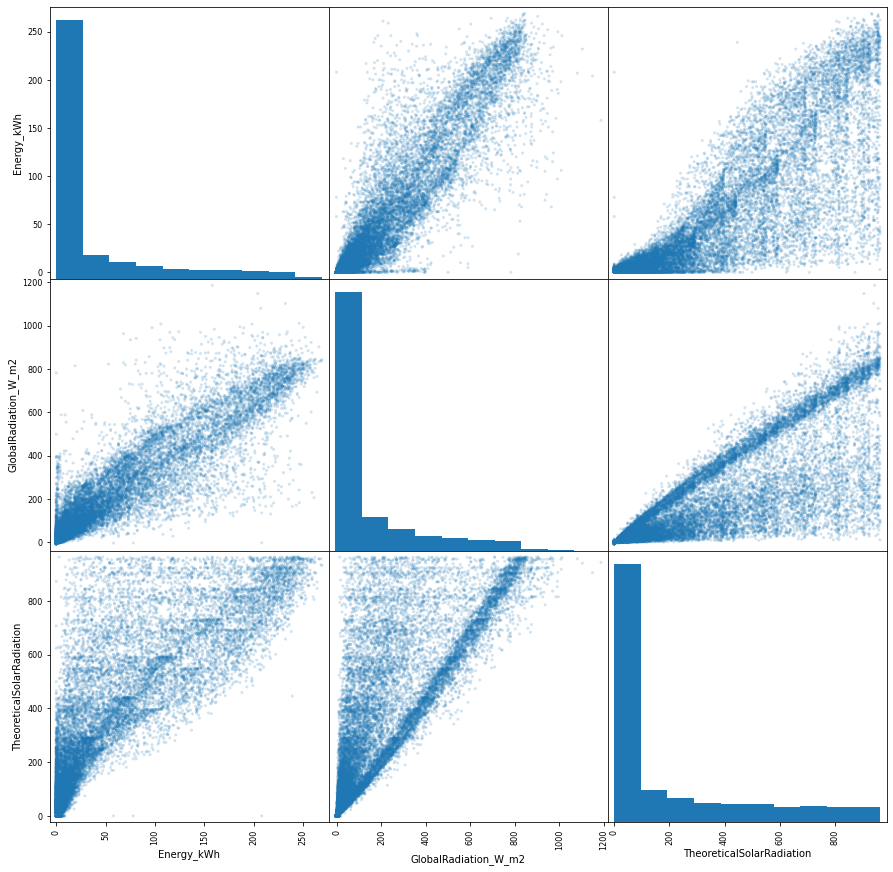

In [11]:
pd.plotting.scatter_matrix(data_t[cols], alpha=0.2, figsize=(15,15));

In [6]:
cols = ['GlobalRadiation_W_m2', 'TheoreticalSolarRadiation']
data_t[cols].corr()

,GlobalRadiation_W_m2,TheoreticalSolarRadiation
GlobalRadiation_W_m2,1.0000,0.8559
TheoreticalSolarRadiation,0.8559,1.0000


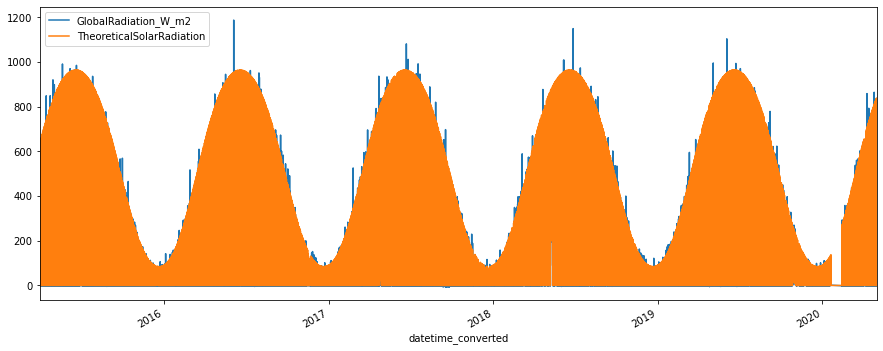

In [9]:
data_t[cols].plot(figsize=(15,6))

In [12]:
data_t.columns

Index(['datetime_converted', 'CloudAmount', 'Pressure_msl_hpa',
       'RelativeHumidity_percent', 'PrecipitationIntensity_mm_h',
       'SnowDepth_cm', 'AirTemperature_degC', 'DewPointTemperature_degC',
       'HorizontalVisibility_m', 'WindDirection', 'GustSpeed_m_s',
       'WindSpeed_m_s', 'Energy_kWh', 'GlobalRadiation_W_m2', 'Hour',
       'DayofYear', 'SolarElevationAngle_deg', 'SunAzimuth_deg',
       'TheoreticalSolarRadiation'],
      dtype='object')